<a href="https://colab.research.google.com/github/Nataliia-Shap/4-course-PatternRecognition/blob/main/%D0%9F%D1%80%D0%B8%D0%BA%D0%BB%D0%B0%D0%B4_5_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Приклад 1. 

(1797, 64)


<Figure size 432x288 with 0 Axes>

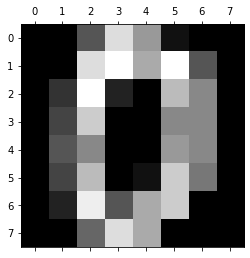

In [22]:
# необхідні бібліотеки
import numpy as np
import random
from keras.datasets import mnist
# класифікатор та метрики
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB,MultinomialNB
# завантажимо дані та розіб'ємо на навчальну та перевірочну
digits = load_digits()
print(digits.data.shape)
plt.gray() 
plt.matshow(digits.images[0]) 
plt.show() 
data, labels = load_digits(return_X_y=True)
(n_samples, n_features), n_digits = data.shape, np.unique(labels).size
#data_pca = PCA(n_components=n_digits).fit_transform(data)
#data=data_pca
data_train=data[0:1436,:]
data_test=data[1437:1797,:]
labels_train=labels[0:1436]
labels_test=labels[1437:1797]



### Байєсівський класифікатор

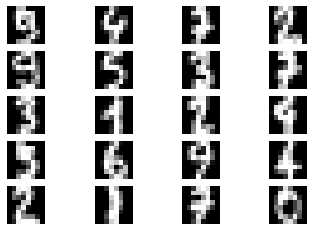

[9. 0. 4. 3. 6. 9. 5. 6. 4. 4. 5. 9. 7. 8. 7. 8. 3. 9. 3. 8.]
[9. 4. 7. 2. 9. 5. 3. 7. 3. 1. 2. 4. 5. 6. 9. 4. 2. 1. 7. 0.]
0.8361111111111111
[2 3 4 5 6 7 8 9 0 9 5 5 6 5 0 9 8 9 8 4 1 7 7 3 5 1 0 0 2 2 7 8 2 0 1 2 6
 3 3 7 3 3 4 6 6 6 4 9 1 5 0 9 5 2 8 2 0 0 1 7 6 3 2 1 7 4 6 3 1 3 9 1 7 6
 8 4 3 1 4 0 5 3 6 9 6 1 7 5 4 4 7 2 8 2 2 5 7 9 5 4 8 8 4 9 0 8 9 8 0 1 2
 3 4 5 6 7 8 9 0 1 2 3 4 5 6 9 0 1 2 3 4 5 6 7 8 9 0 9 5 5 6 5 0 9 8 9 8 4
 1 7 7 3 5 1 0 0 2 2 7 8 2 0 1 2 6 3 3 7 3 3 4 6 6 6 4 9 1 5 0 9 5 2 8 0 1
 7 6 3 2 1 7 4 6 3 1 3 9 1 7 6 8 4 3 1 4 0 5 3 6 9 6 1 7 5 4 4 7 2 2 5 7 9
 5 4 4 9 0 8 9 8 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8
 9 0 9 5 5 6 5 0 9 8 9 8 4 1 7 7 3 5 1 0 0 2 2 7 8 2 0 1 2 6 3 3 7 3 3 4 6
 6 6 4 9 1 5 0 9 5 2 8 2 0 0 1 7 6 3 2 1 7 4 6 3 1 3 9 1 7 6 8 4 3 1 4 0 5
 3 6 9 6 1 7 5 4 4 7 2 8 2 2 5 7 9 5 4 8 8 4 9 0 8 9 8]
[2 3 4 9 6 7 8 9 0 9 5 5 6 5 0 9 8 3 8 4 9 7 7 3 9 9 0 0 2 2 7 9 2 0 9 2 6
 3 3 7 3 3 4 6 6 6 4 9 9 5 0 9 5 2 9 2 0 0 9 7 6 3 

In [10]:
clf_nb = MultinomialNB()
clf_nb.fit(data_train,labels_train)
# зробимо класифікацію за допомогою навченою моделі
y_test_pred_nb = clf_nb.predict(data_test)
lbl_NB = np.zeros(20)
lbl_= np.zeros(20)
for i in range(1,21):
  im_idx = random.randint(0,360)
  lbl_NB[i-1]=y_test_pred_nb[im_idx]
  lbl_[i-1]=labels_train[im_idx]
  plt.subplot(5, 4, i)
  plt.imshow(digits.images[im_idx], cmap='gray')
  plt.axis('off')
plt.show()
print(lbl_NB[:20])
print(lbl_[:20])
a_NB = accuracy_score(labels_test, y_test_pred_nb)
print(a_NB)
#print(labels_test)
#print(y_test_pred_nb)

### kmeans

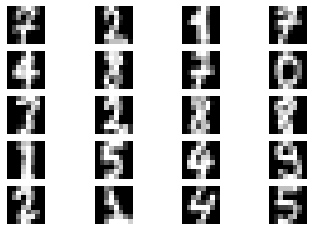

[7. 2. 1. 7. 4. 8. 7. 0. 7. 2. 8. 8. 8. 5. 4. 9. 2. 2. 4. 5.]
[7. 2. 1. 7. 4. 8. 7. 0. 3. 2. 8. 8. 1. 5. 4. 9. 2. 1. 4. 5.]
0.807799442896936


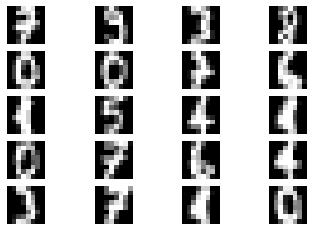

[3. 5. 5. 2. 2. 0. 7. 6. 4. 4. 7. 1. 5. 9. 2. 7. 7. 5. 1. 0.]
[3. 5. 5. 2. 2. 0. 7. 6. 4. 4. 7. 1. 3. 9. 2. 9. 7. 5. 1. 0.]
0.7583333333333333


In [14]:
kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4,random_state=0).fit(data_pca)
#Використаємо навчений класифікатор
km_predict=kmeans.predict(data_test)
reference_labels = {}
for i in range(len(np.unique(km_predict))):
  index = np.where(km_predict == i,1,0)
  num = np.bincount(labels_test[index==1]).argmax()
  reference_labels[i] = num
  number_labels = np.random.rand(len(km_predict))
for i in range(len(km_predict)):
  number_labels[i] = reference_labels[km_predict[i]]
lbl_kmeans = np.zeros(20)
lbl_= np.zeros(20)
for i in range(1,21):
  im_idx = random.randint(0,360)
  lbl_kmeans[i-1]=number_labels[im_idx]
  lbl_[i-1]=labels_test[im_idx]
  plt.subplot(5, 4, i)
  plt.imshow(digits.images[im_idx], cmap='gray')
  plt.axis('off')
plt.show()
print(lbl_kmeans[:20])
print(lbl_[:20])
a_km = accuracy_score(labels_test, number_labels)
print(a_km)

### kmedoid

[2. 2. 7. 6. 6. 7. 1. 9. 9. 9. 1. 1. 6. 1. 9. 9. 8. 9. 8. 4. 1. 7. 7. 1.
 9. 1. 9. 9. 2. 2. 7. 1. 2. 9. 1. 2. 6. 2. 2. 7. 9. 9. 7. 6. 6. 6. 7. 9.
 1. 1. 9. 9. 6. 2. 1. 2. 9. 9. 1. 7. 6. 2. 2. 1. 7. 4. 6. 1. 1. 9. 9. 1.
 7. 6. 8. 7. 1. 9. 7. 9. 9. 2. 6. 9. 6. 1. 7. 9. 4. 7. 7. 2. 8. 2. 2. 6.
 7. 9. 8. 4. 8. 8. 4. 9. 9. 8. 9. 8. 6. 1. 2. 1. 7. 5. 4. 7. 1. 1. 6. 1.
 1. 8. 7. 5. 4. 1. 6. 1. 7. 8. 7. 5. 4. 7. 5. 1. 7. 1. 5. 5. 4. 5. 6. 5.
 7. 5. 4. 7. 1. 7. 7. 5. 5. 1. 4. 9. 9. 2. 7. 5. 1. 6. 1. 2. 4. 5. 5. 7.
 7. 5. 7. 4. 4. 4. 5. 1. 1. 5. 4. 9. 1. 1. 4. 6. 1. 7. 4. 5. 2. 1. 7. 5.
 4. 1. 1. 8. 7. 1. 7. 4. 8. 6. 8. 1. 7. 6. 5. 9. 4. 9. 4. 1. 7. 5. 7. 7.
 7. 2. 1. 5. 7. 8. 5. 5. 7. 5. 9. 1. 5. 7. 9. 1. 2. 1. 4. 1. 6. 7. 5. 9.
 9. 1. 2. 5. 4. 8. 6. 7. 1. 9. 9. 1. 2. 5. 4. 6. 6. 7. 1. 9. 9. 9. 5. 8.
 6. 5. 6. 9. 4. 9. 5. 7. 1. 7. 7. 5. 1. 1. 9. 6. 2. 2. 7. 5. 2. 7. 1. 2.
 6. 8. 5. 7. 4. 5. 4. 4. 6. 6. 4. 9. 1. 1. 9. 9. 6. 2. 1. 2. 6. 9. 1. 7.
 6. 5. 2. 1. 7. 4. 4. 1. 1. 1. 9. 1. 7. 6. 5. 4. 5.

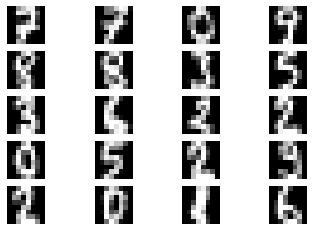

[6. 9. 1. 5. 7. 1. 6. 8. 1. 6. 9. 1. 9. 1. 4. 2. 1. 6. 7. 7.]
[0. 9. 5. 5. 7. 5. 6. 9. 5. 6. 0. 8. 9. 1. 8. 2. 1. 6. 7. 0.]
0.5166666666666667


In [28]:
!pip install scikit-learn-extra API
from sklearn_extra.cluster import KMedoids
kmedoid = KMedoids(n_clusters=n_digits, random_state=0).fit(data_test)
#Використаємо навчений класифікатор
km_predict=kmedoid.predict(data_test)
reference_labels = {}
for i in range(len(np.unique(km_predict))):
  index = np.where(km_predict == i,1,0)
  num = np.bincount(labels_test[index==1]).argmax()
  reference_labels[i] = num
  number_labels = np.random.rand(len(km_predict))
for i in range(len(km_predict)):
  number_labels[i] = reference_labels[km_predict[i]]
lbl_kmedoid = np.zeros(20)
lbl_= np.zeros(20)
for i in range(1,21):
  im_idx = random.randint(0,360)
  lbl_kmedoid[i-1]=number_labels[im_idx]
  lbl_[i-1]=labels_test[im_idx]
  plt.subplot(5, 4, i)
  plt.imshow(digits.images[im_idx], cmap='gray')
  plt.axis('off')
plt.show()
print(lbl_kmedoid[:20])
print(lbl_[:20])
a_km = accuracy_score(labels_test, number_labels)
print(a_km)

### Ієрархічна кластеризація

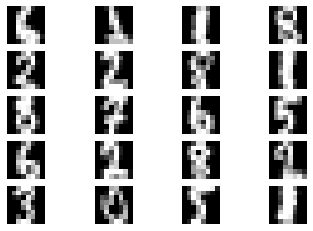

[6. 2. 1. 8. 8. 2. 1. 1. 8. 7. 6. 5. 6. 2. 1. 2. 3. 0. 5. 1.]
[6. 1. 1. 8. 2. 2. 8. 1. 8. 7. 6. 5. 6. 2. 8. 2. 3. 0. 5. 1.]
0.7846410684474123


In [32]:
from sklearn.cluster import AgglomerativeClustering
ac_predict= AgglomerativeClustering(n_clusters=n_digits).fit_predict(data)
#Використаємо навчений класифікатор
#ac_predict=AC.predict(data_test)
reference_labels = {}
for i in range(len(np.unique(ac_predict))):
  index = np.where(ac_predict == i,1,0)
  num = np.bincount(labels[index==1]).argmax()
  reference_labels[i] = num
  number_labels = np.random.rand(len(ac_predict))
for i in range(len(ac_predict)):
  number_labels[i] = reference_labels[ac_predict[i]]
lbl_ac = np.zeros(20)
lbl_= np.zeros(20)
for i in range(1,21):
  im_idx = random.randint(0,1767)
  lbl_ac[i-1]=number_labels[im_idx]
  lbl_[i-1]=labels[im_idx]
  plt.subplot(5, 4, i)
  plt.imshow(digits.images[im_idx], cmap='gray')
  plt.axis('off')
plt.show()
print(lbl_ac[:20])
print(lbl_[:20])
a_ac = accuracy_score(labels, number_labels)
print(a_ac)


### Affinity Propagation

[52 71  3 ... 61 21 42]


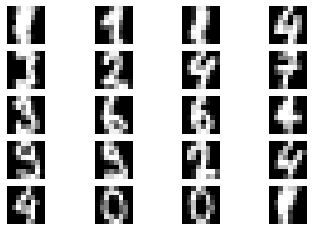

[1. 1. 1. 4. 3. 2. 4. 7. 3. 6. 6. 4. 9. 5. 2. 4. 4. 0. 0. 1.]
[1. 1. 1. 4. 3. 2. 4. 7. 3. 6. 6. 4. 9. 9. 2. 4. 4. 0. 0. 1.]
0.9543683917640512


In [35]:
from sklearn.cluster import AffinityPropagation
af = AffinityPropagation().fit(data)
af_predict = af.labels_
print(af_predict)
reference_labels = {}
for i in range(len(np.unique(af_predict))):
  index = np.where(af_predict == i,1,0)
  num = np.bincount(labels[index==1]).argmax()
  reference_labels[i] = num
  number_labels = np.random.rand(len(af_predict))
for i in range(len(af_predict)):
  number_labels[i] = reference_labels[af_predict[i]]
lbl_ac = np.zeros(20)
lbl_= np.zeros(20)
for i in range(1,21):
  im_idx = random.randint(0,1767)
  lbl_ac[i-1]=number_labels[im_idx]
  lbl_[i-1]=labels[im_idx]
  plt.subplot(5, 4, i)
  plt.imshow(digits.images[im_idx], cmap='gray')
  plt.axis('off')
plt.show()
print(lbl_ac[:20])
print(lbl_[:20])
a_ac = accuracy_score(labels, number_labels)
print(a_ac)